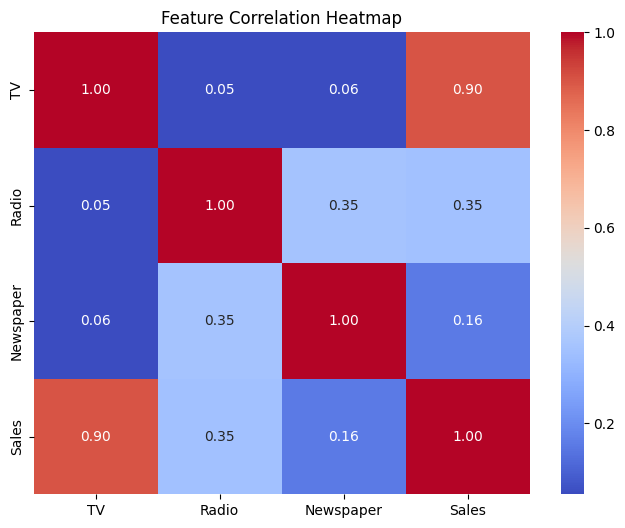

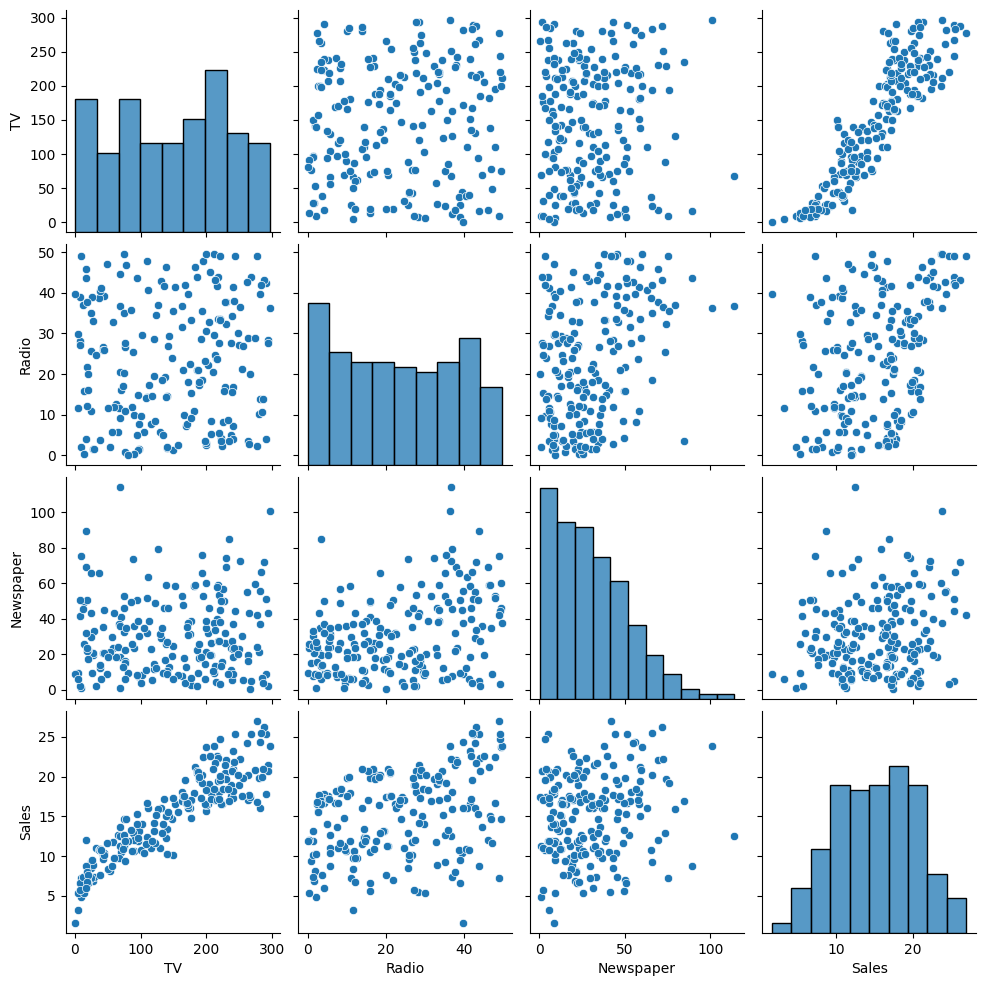

R² Score: 0.9059
MAE: 1.2748
RMSE: 1.7052


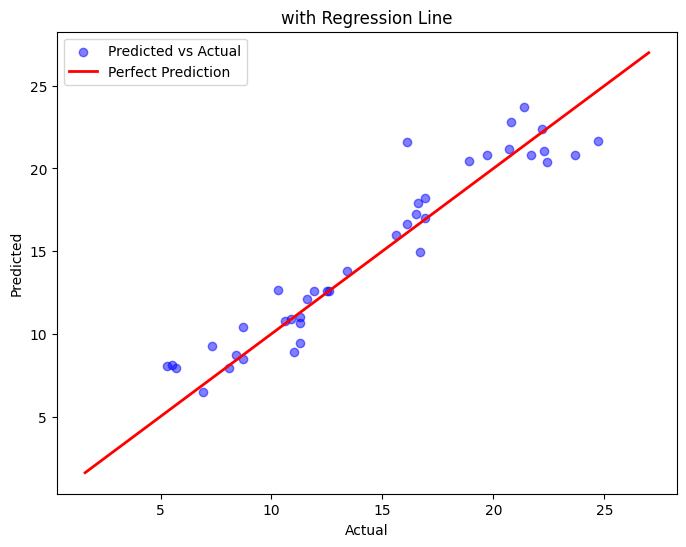

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sample DataFrame
data = pd.read_csv('advertising.csv')

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
sns.pairplot(data)
plt.show()

# Defining X and y
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Scatter Plot with Regression Line (for TV vs Sales)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')  
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prediction')  
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("with Regression Line")
plt.legend()
plt.show()


WITH PCA

Explained Variance by Components: [0.45695084 0.32775205]
R² Score: 0.8474
MAE: 1.6823
RMSE: 2.1713


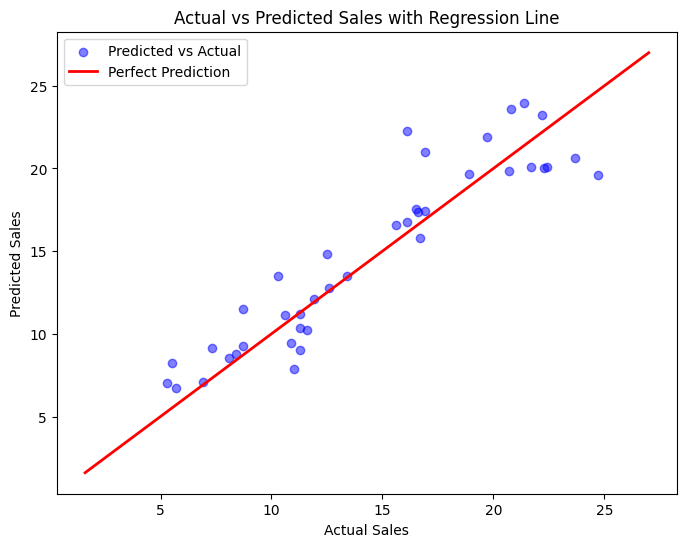

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = pd.read_csv('advertising.csv')

# Defining Features and Target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Standardizing Features (PCA requires scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_pca = pca.fit_transform(X_scaled)

# Explained Variance
print(f"Explained Variance by Components: {pca.explained_variance_ratio_}")

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Scatter Plot: Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')  
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Perfect Prediction')  
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales with Regression Line")
plt.legend()
plt.show()



WITH LDA

R² Score: 0.8638
MAE: 1.5979
RMSE: 2.0512


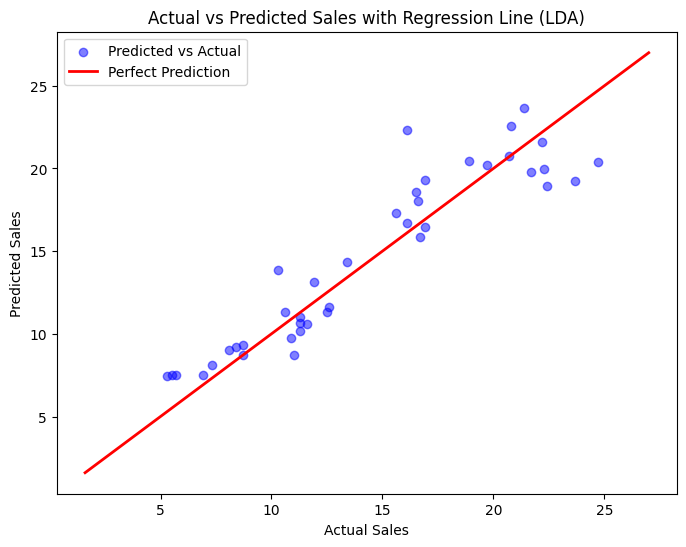

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Sample DataFrame
data = pd.read_csv('advertising.csv')

# Convert Sales into Categorical Classes for LDA
data['Sales_Category'] = pd.qcut(data['Sales'], q=2, labels=[0, 1])  # Two categories (Low, High)

# Defining Features and Target for LDA
X = data[['TV', 'Radio', 'Newspaper']]
y_lda = data['Sales_Category']  # LDA requires categorical target

# Standardizing Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # Reduce to 1 component
X_lda = lda.fit_transform(X_scaled, y_lda)

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X_lda, data['Sales'], test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Regression Metrics
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Scatter Plot: Actual vs Predicted Sales
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')  
plt.plot([data['Sales'].min(), data['Sales'].max()], 
         [data['Sales'].min(), data['Sales'].max()], 
         color='red', linewidth=2, label='Perfect Prediction')  
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales with Regression Line (LDA)")
plt.legend()
plt.show()
